<center> <img width=400 src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px; height:auto">

# <center> Проект: Анализ вакансий на hh.ru
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

import plotly.io as pio
pio.renderers.default = "png"

# Исследование структуры данных

## 1\. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
hh_data = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=";")

## 2\. Выведите несколько первых (последних строк таблицы), чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
hh_data.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


## 3\. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице

## 4\. Обратите внимание на информацию о числе непустых значений

In [4]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

## 5\. Выведите основную статистическую информацию о столбцах.


In [5]:
display(hh_data.describe())

stats = {}
for col in hh_data.columns:
    top_freq = 100 * round(hh_data[col].value_counts(normalize=True).max(), 4)
    nunique_ratio = 100 * round(hh_data[col].nunique() / hh_data[col].count(), 4)
    isnull = hh_data[col].isnull().sum()
    stats[col] = {'top_freq, %': top_freq, 'unique, %': nunique_ratio, 'isnull (count)': isnull}

display(pd.DataFrame(stats).transpose())

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


,"top_freq, %","unique, %",isnull (count)
"Пол, возраст",0.04,35.77,0.0
ЗП,9.08,1.54,0.0
Ищет работу на должность:,6.93,33.37,0.0
"Город, переезд, командировки",2.82,22.49,0.0
Занятость,67.11,0.08,0.0
График,50.79,0.11,0.0
Опыт работы,0.01,99.63,168.0
Последнее/нынешнее место работы,2.09,67.53,1.0
Последняя/нынешняя должность,4.61,37.83,2.0
Образование и ВУЗ,0.01,89.73,0.0


# Преобразование данных

## 1\. Начнем с простого - с признака **"Образование и ВУЗ"**. 

Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [6]:
cleansed_data = hh_data.copy()

def categorize_education(x) -> str:
    for education_level in ['среднее специальное', 'среднее', 'неоконченное высшее', 'высшее']:
        if x.lower().find(education_level) == 0:
            return education_level
    return np.nan

cleansed_data['Образование'] = cleansed_data['Образование и ВУЗ'].apply(categorize_education)
cleansed_data.drop('Образование и ВУЗ', axis='columns', inplace=True)

display(cleansed_data['Образование'].isnull().sum())
display(cleansed_data.head())

0

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее


## 2\. Теперь нас интересует столбец **"Пол/возраст"**. 

Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000

Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [7]:
def parse_sex(x) -> str:
    if x.find('Мужчина') == 0: 
        return 'М'
    if x.find('Женщина') == 0: 
        return 'Ж'
    return np.nan

def parse_age(x) -> int:
    age_string = x.split(',')[1]
    age = age_string.strip().split(' ')[0]
    return int(age)
    

cleansed_data['Пол'] = cleansed_data['Пол, возраст'].apply(parse_sex)
cleansed_data['Возраст'] = cleansed_data['Пол, возраст'].apply(parse_age)

cleansed_data.drop('Пол, возраст', axis='columns', inplace=True)

display(cleansed_data['Пол'].value_counts())
display(cleansed_data['Пол'].value_counts(normalize=True))
display(cleansed_data['Возраст'].describe())

М    36211
Ж     8533
Name: Пол, dtype: int64

М    0.809293
Ж    0.190707
Name: Пол, dtype: float64

count    44744.000000
mean        32.196741
std          7.929800
min         14.000000
25%         27.000000
50%         31.000000
75%         36.000000
max        100.000000
Name: Возраст, dtype: float64

## 3\. Следующим этапом преобразуем признак **"Опыт работы"**. 

Его текущий формат это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-третьих, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [8]:
def parse_experience(x) -> int:
    
    # return NaN if the input is NaN
    if x is np.nan:
        return x
    
    entries = x.split('  ')
    
    # return NaN if entry is not literally NaN, but something like 'Не указано'
    if len(entries) < 2:
        return np.nan
    
    # creating a list of experience entries and removing first two words - "Опыт работы"
    experience = entries[0].strip().split(' ')
    experience.pop(0)
    experience.pop(0)
    
    if len(experience) == 4:
        return 12*int(experience[0]) + int(experience[2])
    elif experience[1][0] == 'м':
        return int(experience[0])
    else:
        return 12*int(experience[0])

cleansed_data['Опыт работы (месяц)'] = cleansed_data['Опыт работы'].apply(parse_experience)

display(cleansed_data['Опыт работы (месяц)'].isnull().sum())
display(cleansed_data['Опыт работы (месяц)'].describe())

cleansed_data.drop('Опыт работы', axis='columns', inplace=True)

cleansed_data.info()

170

count    44574.000000
mean       114.418944
std         79.047861
min          1.000000
25%         57.000000
50%        100.000000
75%        154.000000
max       1188.000000
Name: Опыт работы (месяц), dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44744 non-null  object 
 1   Ищет работу на должность:        44744 non-null  object 
 2   Город, переезд, командировки     44744 non-null  object 
 3   Занятость                        44744 non-null  object 
 4   График                           44744 non-null  object 
 5   Последнее/нынешнее место работы  44743 non-null  object 
 6   Последняя/нынешняя должность     44742 non-null  object 
 7   Обновление резюме                44744 non-null  object 
 8   Авто                             44744 non-null  object 
 9   Образование                      44744 non-null  object 
 10  Пол                              44744 non-null  object 
 11  Возраст                          44744 non-null  int64  
 12  Опыт работы (месяц

## 4\. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". 

Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов миллионников:
    
   <code> million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']</code>
    
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*

In [9]:
import re

million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']

def categorize_city(x) -> str:
    if x == 'Москва' or x == 'Санкт-Петербург':
        return x
    elif x in million_cities:
        return 'город миллионник'
    else:
        return 'другие'
    
def parse_city(x):
    entries = x.split(',')
    return categorize_city(entries[0].strip())

def parse_relocation(x) -> bool:
    out = re.search('не готов[^,]+переезд', x, re.IGNORECASE)
    return out is None

def parse_trips(x) -> bool:
    trip_entry_exist = re.search('командировк', x, re.IGNORECASE)
    if trip_entry_exist is not None:
        out = re.search('не готов[^,]+командировк', x, re.IGNORECASE)
        return out is None
    else:
        return np.nan
    

feature = 'Город, переезд, командировки'
if feature in cleansed_data.columns:
    print('Performing parsing of', feature)
    cleansed_data['Город'] = cleansed_data[feature].apply(parse_city)
    cleansed_data['Готовность к переезду'] = cleansed_data[feature].apply(parse_relocation)
    cleansed_data['Готовность к командировкам'] = cleansed_data[feature].apply(parse_trips)
    cleansed_data.drop(feature, axis=1, inplace=True)

cleansed_data[ cleansed_data['Готовность к переезду'] & cleansed_data['Готовность к командировкам'] ]

Performing parsing of Город, переезд, командировки


,ЗП,Ищет работу на должность:,Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам
7,70000 руб.,Инженер АСУ ТП,полная занятость,полный день,ФМ-инжиниринг,Инженер АСУ ТП,07.05.2019 17:59,Не указано,высшее,М,29,47.0,Москва,True,True
8,65000 руб.,Ревизор,полная занятость,полный день,ФГБУ РСВО,Старший специалист,11.04.2019 11:08,Имеется собственный автомобиль,неоконченное высшее,М,29,105.0,Москва,True,True
16,120000 руб.,"Дизайнер продукта, UX/UI",полная занятость,полный день,Zenon,"Дизайнер продукта, UX/UI дизайнер",12.04.2019 15:05,Не указано,высшее,М,29,109.0,Москва,True,True
17,30000 руб.,Инженер Отдела IT,частичная занятость,полный день,Великолукский мясокомбинат,Дежурный IT-инженер,11.04.2019 07:40,Не указано,неоконченное высшее,М,37,189.0,другие,True,True
19,55000 руб.,Менеджер интернет-магазина,полная занятость,полный день,"Интернет-магазин ""Доктор Кастом Ру"" (ИП Смолин...",Руководитель отдела веб-продаж и сервиса,07.05.2019 15:37,Не указано,неоконченное высшее,М,38,143.0,город миллионник,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44736,800 бел.руб.,"мастер по ремонту, водитель,продавец-консультант","частичная занятость, полная занятость","гибкий график, полный день, сменный график","""Электросервис и ко""",Специалист по продажам,22.04.2019 01:03,Не указано,высшее,М,32,125.0,другие,True,True
44738,150000 руб.,head of helpdesk,полная занятость,полный день,"Будущее, НПФ",Начальник отдела технического обеспечения,08.04.2019 09:47,Не указано,высшее,М,37,205.0,Москва,True,True
44739,50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...",полная занятость,"полный день, удаленная работа","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,22.04.2019 12:32,Не указано,высшее,М,30,91.0,другие,True,True
44740,39000 руб.,"Системный администратор, IT-специалист","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...",ИП Пестрецов,Предприниматель,22.04.2019 13:11,Не указано,высшее,М,27,84.0,другие,True,True


## 5\. Рассмотрим поближе признаки **"Занятость"** и **"График"**. 

Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).

На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:

<center><img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg width=400 style="width:400px;height:auto;"></center>


Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [10]:
feature = { 
           'Занятость': ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка'],
           'График': ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод'],
           }

for item in feature:
    for option in feature[item]:
        cleansed_data[option] = cleansed_data[item].apply(lambda x: x.find(option)>=0) 
        
cleansed_data.drop(feature.keys(), axis=1, inplace=True)
cleansed_data

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,полная занятость,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,...,True,True,True,False,False,True,True,True,True,True
1,40000 руб.,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0,...,True,True,True,False,False,True,True,True,True,False
2,20000 руб.,Оператор,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0,...,True,False,False,False,False,True,False,False,False,False
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38,225.0,...,True,True,True,False,False,False,False,True,True,False
4,140000 руб.,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26,67.0,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,22.04.2019 12:32,Не указано,высшее,М,30,91.0,...,True,False,False,False,False,True,False,False,True,False
44740,39000 руб.,"Системный администратор, IT-специалист",ИП Пестрецов,Предприниматель,22.04.2019 13:11,Не указано,высшее,М,27,84.0,...,True,True,True,False,False,True,True,True,True,False
44741,40000 руб.,"Аналитик данных, Математик","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,09.04.2019 05:07,Не указано,высшее,Ж,48,257.0,...,True,False,False,False,False,True,False,False,True,False
44742,20000 руб.,Контент-менеджер,IQ-Maxima,Менеджер проектов,26.04.2019 14:25,Имеется собственный автомобиль,высшее,М,24,46.0,...,True,True,False,False,False,False,False,False,True,False


## 6\. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 

В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<center><img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg style="width:400px;height:auto" width=400></center>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [11]:
exchange_rates = pd.read_csv('ExchangeRates.csv')
exchange_rates['date'] = pd.to_datetime(exchange_rates['date']).dt.date
exchange_rates.drop(['per', 'time', 'vol'], axis=1, inplace=True)

cleansed_data['Обновление резюме'] = pd.to_datetime(cleansed_data['Обновление резюме'])
cleansed_data['salary'] = cleansed_data['ЗП'].apply(lambda x: x.split(' ')[0].strip())
cleansed_data['currency'] = cleansed_data['ЗП'].apply(lambda x: x.split(' ')[1].strip())
currency_conv = {
    'руб.': 'RUB',
    'бел.руб.': 'BYN',
    'KZT': 'KZT',
    'EUR': 'EUR',
    'USD': 'USD',
    'грн.': 'UAH',
    'сум': 'UZS',
    'KGS': 'KGS',
    'AZN': 'AZN'
}
cleansed_data['currency'] = cleansed_data['currency'].apply(lambda x: currency_conv[x])
cleansed_data['date'] = cleansed_data['Обновление резюме'].dt.date

merged = cleansed_data.merge(exchange_rates, how='left', left_on=['currency','date'], right_on=['currency', 'date'])
merged = merged.fillna(
    {
        'close':1,
        'proportion':1,
    }
)


merged['salary'] = merged['salary'].astype(np.float64)

merged['ЗП (руб)'] = merged['salary'] * merged['close'] / merged['proportion']
merged[merged['currency']!='RUB']

converted_salaries_data = merged.drop(['ЗП', 'salary', 'currency', 'date', 'close', 'proportion'], axis=1)
converted_salaries_data['ЗП (руб)'].describe()['50%']

cleansed_data = converted_salaries_data
cleansed_data

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16 15:59:00,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,...,True,True,False,False,True,True,True,True,True,29000.0
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-12-04 08:42:00,Не указано,высшее,М,60,233.0,другие,...,True,True,False,False,True,True,True,True,False,40000.0
2,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16 08:35:00,Не указано,среднее специальное,Ж,36,123.0,другие,...,False,False,False,False,True,False,False,False,False,20000.0
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-08-04 14:23:00,Не указано,высшее,М,38,225.0,другие,...,True,True,False,False,False,False,True,True,False,100000.0
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22 10:32:00,Не указано,высшее,Ж,26,67.0,Москва,...,False,False,False,False,True,False,False,False,False,140000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,"Финансист, аналитик, экономист, бухгалтер, мен...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,2019-04-22 12:32:00,Не указано,высшее,М,30,91.0,другие,...,False,False,False,False,True,False,False,True,False,50000.0
44740,"Системный администратор, IT-специалист",ИП Пестрецов,Предприниматель,2019-04-22 13:11:00,Не указано,высшее,М,27,84.0,другие,...,True,True,False,False,True,True,True,True,False,39000.0
44741,"Аналитик данных, Математик","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,2019-09-04 05:07:00,Не указано,высшее,Ж,48,257.0,город миллионник,...,False,False,False,False,True,False,False,True,False,40000.0
44742,Контент-менеджер,IQ-Maxima,Менеджер проектов,2019-04-26 14:25:00,Имеется собственный автомобиль,высшее,М,24,46.0,другие,...,True,False,False,False,False,False,False,True,False,20000.0


# Исследование зависимостей в данных

## 1\. Постройте распределение признака **"Возраст"**. 

Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?

*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

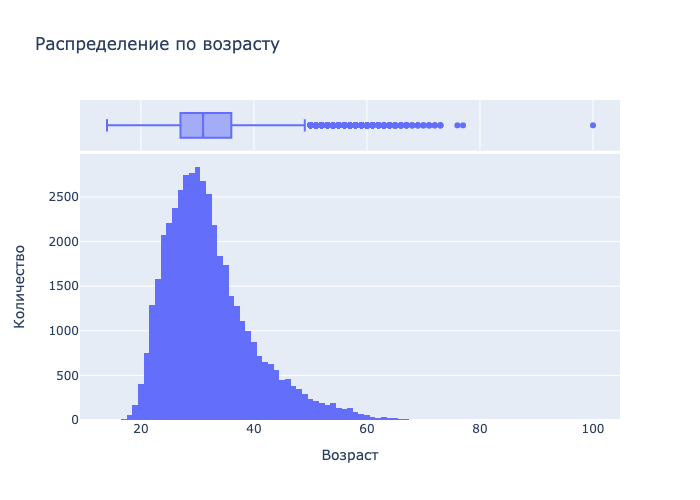

In [12]:
feature = 'Возраст'
title = 'Распределение по возрасту' #feature

fig = px.histogram(cleansed_data, x=feature, title=title, marginal='box')
fig.update_layout(yaxis_title="Количество")
fig.show()

### Выводы

Распределение по возрасту более или менее нормальное с более длинной правой стороной, что вполне логично в данном случае. 
Мода распределения - 30 лет. Предельные значения (по коробке с усами) - от 14 до 49 лет. 
Большинство соискателей (если смотреть ни гистограмму) имеют возраст примерно от 23 до 40 лет.

Однако есть очень интересное значение в районе 100 лет. Это соответствует записи №33654. Такое возможно, но очень маловероятно, учитывая что образование этот человек получил 2015 году и имеет опят работы 2 года и 6 месяцев. За 100 лет можно было бы куда больше опыта работы получить. Понятно, что всё это шутки, и человек просто вбил 1 января 1919 года при регистрации на сайте (данные у нас скорее всего за 2019 год). Видимо, лениво было вбивать дату точно.

Также вызывает подозрение 14-ти летний мужчина с почти 40 годами опыта (запись №29098). Тоже скорее всего ошибка ввода данных.

Остальные крайние значения в районе 70+, а также и в ~15 лет выглядят правдоподобно. 

## 2\. Постройте распределение признака **"Опыт работы (месяц)"**. 

Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?

*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

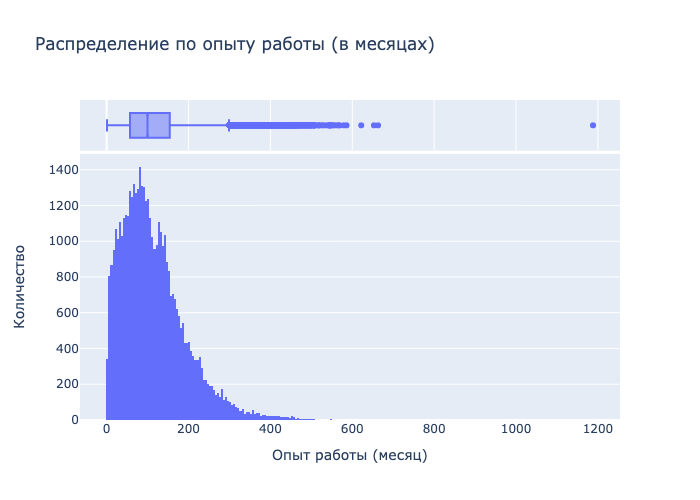

In [13]:
feature = 'Опыт работы (месяц)'
title = 'Распределение по опыту работы (в месяцах)'

fig = px.histogram(cleansed_data, x=feature, title=title, marginal='box')
fig.update_layout(yaxis_title="Количество")
fig.show()

### Выводы

Мода опыта работы - 80-84 месяца (по гистограмме) или 81 (если подсчитать программно). 
Предельные значения (по коробке с усами) - от 1 до 299 месяцев.
Большинство кандидатов (по гистограмме) имеют имеют опыт от 5 до 250 месяцев.

Коробочная диаграмма показывает много выбросов справа, но для данных данных это нормально. Большинство анкет заполнено молодыми людьми, потому и медианное значение - 100 месяцев.

В данном случае картинку сильно портит один нехороший человек 1971 года рождения, который указал опыт работы в 99 лет. Все остальные данные выглядят правдоподобно. Для очистки данных надо будет проверить что опыт работы, как минимум, не превосходит возраст человека.

## 3\. Постройте распределение признака **"ЗП (руб)"**. 

Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.

*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


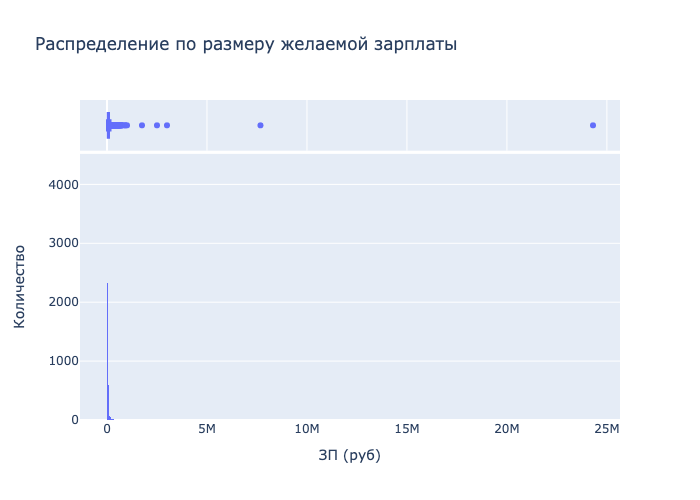

In [14]:
feature = 'ЗП (руб)'
title = 'Распределение по размеру желаемой зарплаты'

fig = px.histogram(cleansed_data, x=feature, title=title, marginal='box')
fig.update_layout(yaxis_title="Количество")
fig.show()

### Выводы

Модальное значение желаемой зарплаты - от 47.5 до 52.5 тысяч рублей (по гистограмме) и 50,000 рублей (программно).
Предельные значения (по коробке с усами) - 1 и 181 тысяч рублей.
Большинство значений желаемой зарплаты (если посмотреть на гистограмму и коробку с усами) лежат в промежутке между 25 и 100 тысяч рублей.

На самом деле, очень грустные диаграммы - выбросы сильно испортили визуальную привлекательность диаграммы. Заказчику такое показывать нельзя. 

5 человек с требуемой зарплатой выше 1 млн рублей совершенно портят картинку. Есть подозрение, что требуемые зарплаты являются ошибкой ввода (либо лишний 0, либо неправильная валюта). Скажем, в записи №6931 можно ещё поверить в зарплату 380,000 рублей в месяц, но уж никак не USD; в записи №28253 требуемая зарплата может быть 300,000 рублей, но никак не 3,000,000. Аналогично и с прочими зарплатами схожих размеров.

## 4\. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). 

Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.

*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

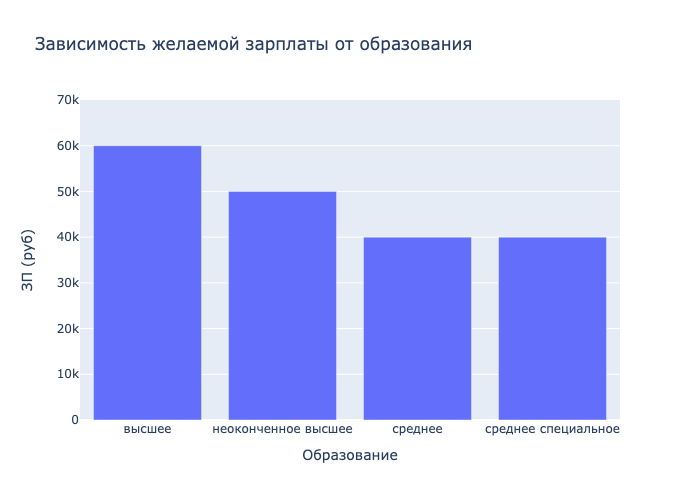

In [15]:
plot_data = cleansed_data[cleansed_data['ЗП (руб)']<1_000_000].groupby('Образование', as_index=False)['ЗП (руб)'].median()

fig = px.bar(plot_data, x='Образование', y='ЗП (руб)', title='Зависимость желаемой зарплаты от образования')
fig.update_layout(showlegend=False, yaxis_range=[0,70_000])
fig.show()

### Выводы

На этой диаграмме мы можем наблюдать что желаемая зарплата практически линейно зависит уровня образования. 
Потому уровень образования без сомнений важен для прогнозирования заработной платы.

## 5\. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). 

Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.

*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

,Город,ЗП (руб)
0,Москва,85000.0
1,Санкт-Петербург,60000.0
2,город миллионник,40000.0
3,другие,40000.0


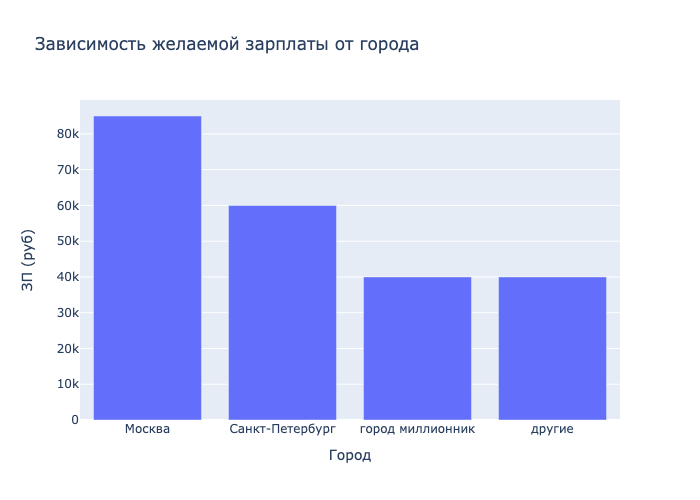

In [16]:
plot_data = cleansed_data[cleansed_data['ЗП (руб)']<1_000_000].groupby('Город', as_index=False)['ЗП (руб)'].median()
display(plot_data)

fig = px.bar(plot_data, x='Город', y='ЗП (руб)', title='Зависимость желаемой зарплаты от города')
fig.show()

### Выводы

Желаемая зарплата в Москве более чем в 2 раза больше, чем в прочих городах России. В Питере же - только в 1.5 раза больше. Признак "Город" - очень важный признак для прогнозирования.

## 6\. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. 

Проанализируйте график, сравнив уровень заработной платы в категориях.

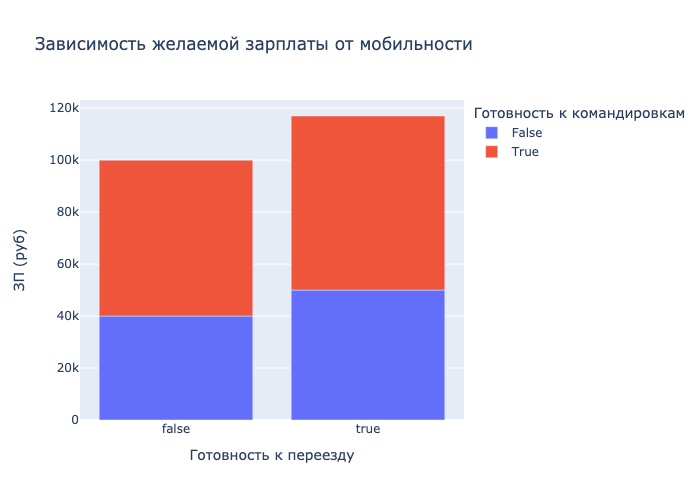

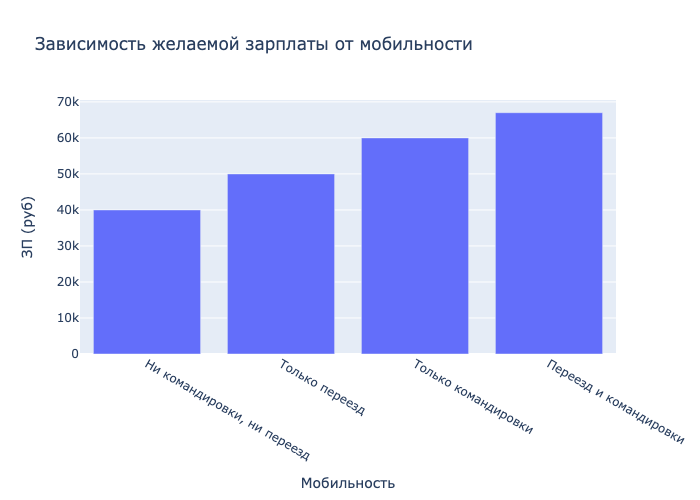

In [17]:
plot_data = cleansed_data.copy()
plot_data['Готовность к командировкам'].fillna(True, inplace=True)


plot_data = plot_data.groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (руб)'].median().sort_values(by='ЗП (руб)')

fig = px.bar(plot_data, x='Готовность к переезду', color='Готовность к командировкам', y='ЗП (руб)', title='Зависимость желаемой зарплаты от мобильности')
fig.show()

def categorize_mobility(x, y=False) -> str:
    if x == True and y == True:
        return 'Переезд и командировки'
    elif x == True and y == False:
        return 'Только переезд'
    elif x == False and y == True:
        return 'Только командировки'
    else:
        return 'Ни командировки, ни переезд'

plot_data['Мобильность'] = np.nan
mobility_column = plot_data.columns.get_loc('Мобильность')
for i in plot_data.index:
    plot_data.iloc[i, mobility_column] = categorize_mobility(plot_data.iloc[i]['Готовность к переезду'], plot_data.iloc[i]['Готовность к командировкам'])

fig = px.bar(plot_data, x='Мобильность', y='ЗП (руб)', title='Зависимость желаемой зарплаты от мобильности')
fig.show()

### Выводы

*Я тут построил две диаграммы, мне цветная не особо понравилась, потому я ввёл ещё одну характеристику - "Мобильность".*

Ожидаемо, что люди с бóльшей мобильностью ожидают получить бóльшую зарплату.

## 7\. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). 

На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

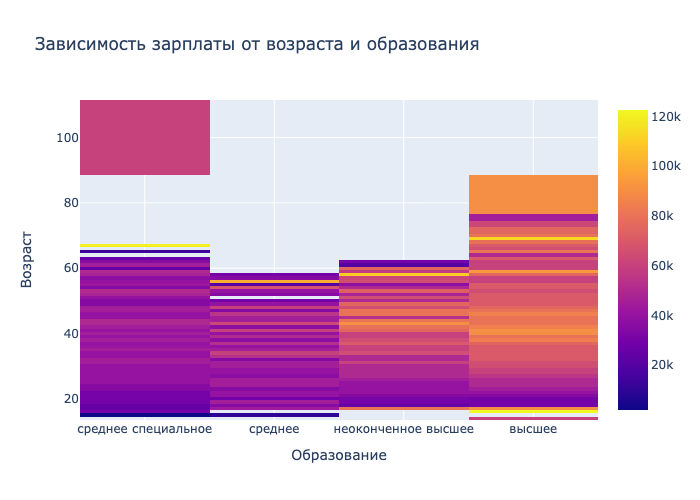

In [18]:
plot_data = cleansed_data

pivot = plot_data.pivot_table(values='ЗП (руб)', index='Возраст', columns='Образование', aggfunc='median')
pivot = pivot[ ['среднее специальное','среднее', 'неоконченное высшее', 'высшее'] ]

fig = px.imshow(pivot, title='Зависимость зарплаты от возраста и образования')
fig.update_yaxes(autorange=True)
fig.show()

### Выводы

Очень интересная картинка! 

Во-первых, мы наблюдаем наши выбросы:
* и столетнего кандидата
* и кандидатов моложе 20-ти лет с высшим образованием

Во-вторых, мы можем сразу понять, что чем выше образование, тем больше возраст кандидатов.

В-третьих, мы опять же видим, что желаемая зарплата растёт не только с возрастом, но и с уровнем образования.

*Но как же бесит этот столетний кандидат, прям глаз режет!*

## 8\. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). 

Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

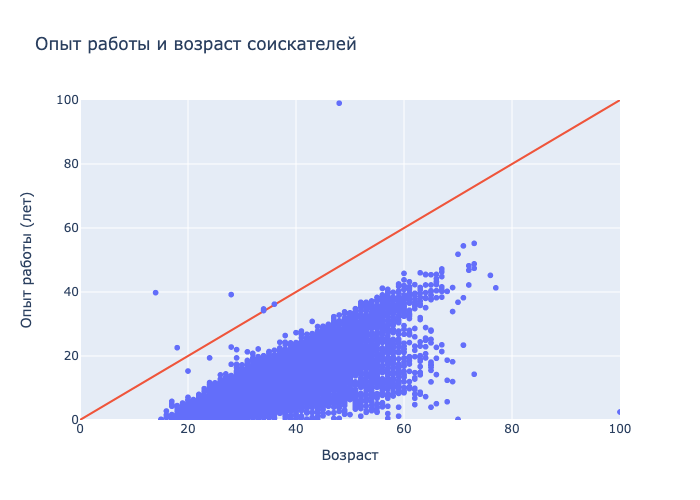

In [19]:
plot_data = cleansed_data.copy()
plot_data['Опыт работы (лет)'] = plot_data['Опыт работы (месяц)'].apply(lambda x: round(x/12,1) if x is not np.nan else np.nan)

fig = px.scatter(plot_data, y='Опыт работы (лет)', x='Возраст', title='Опыт работы и возраст соискателей')
fig.add_trace(go.Scatter(x=[0,100], y=[0,100], mode='lines', name='Возраст равен опыту'))
fig.update_layout(yaxis_range=[0,100], xaxis_range=[0,100], showlegend=False)
fig.show()

### Выводы

Супер! Где-то выше я писал, что надо бы проверить, что опыт не превышает возраста соискателя. Теперь я рад, что мы это сделали. :-)

На этой диаграмме мы видим некоторые аномалии:
* несколько соискателей указали опыт больше, чем из возраст
* мы опять видим соискателя, которому 100 лет
* мы видим несколько аномалий которые ниже линии, но всё же довольно к ней близки - некоторые люди утверждают, что они начали работать в пять-шесть лет? Подозрительно!

## **Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


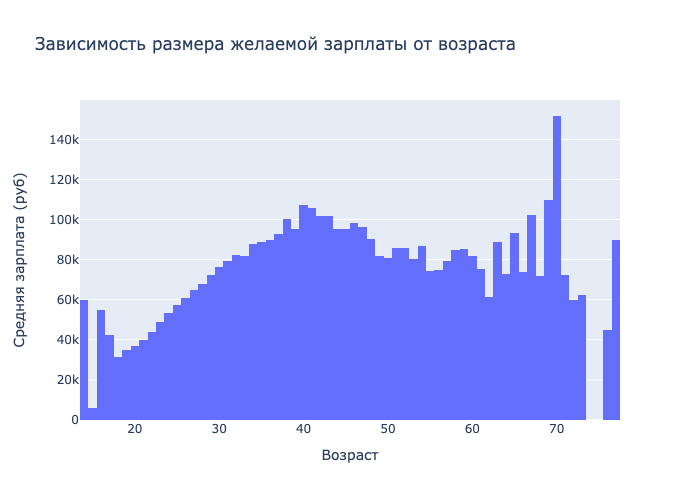

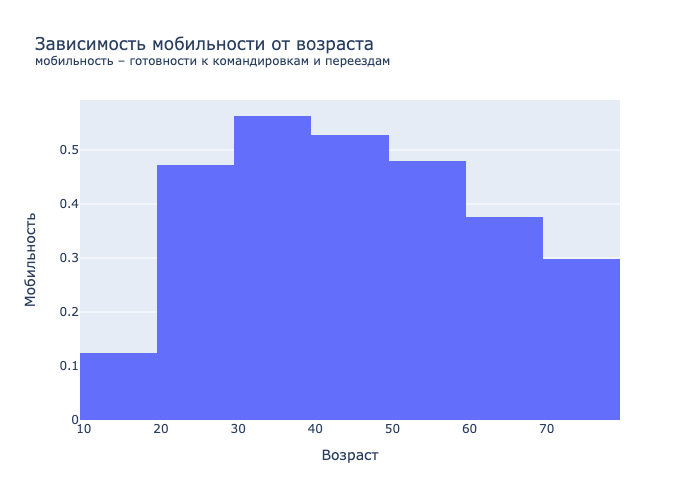

In [20]:
plot_data = cleansed_data[ (cleansed_data['ЗП (руб)'] < 1_000_000) & ((cleansed_data['Возраст'] < 100)) ].copy()

fig = px.histogram(plot_data, x='Возраст', y='ЗП (руб)', histfunc='avg', title='Зависимость размера желаемой зарплаты от возраста')
fig.update_layout(yaxis_title="Средняя зарплата (руб)")
fig.show()


plot_data['Мобильность'] = .5*(plot_data['Готовность к командировкам'] + plot_data['Готовность к переезду'])
mobility_data = plot_data.groupby('Возраст', as_index=False)['Мобильность'].mean()

fig = px.histogram(mobility_data, x='Возраст', y='Мобильность', histfunc='avg', title='Зависимость мобильности от возраста<br><sup>мобильность – готовности к командировкам и переездам</sup>')
fig.update_layout(yaxis_title="Мобильность")
fig.show()

### Выводы

Рассмотрим две диаграммы выше. Для этих диаграмм я выбросил данные с желаемой зарплатой выше 1 млн рублей и ограничил возраст 99 годами.

Первая диаграмма показывает размер желаемой зарплаты от возраста. Отличие от тепловой диаграммы выше в том, что я хотел показать интересную закономерность - с возрастом размер желаемой зарплаты в целом падает, но при этом наблюдаются всплески. Это потому, что количество анкет для более возрастных кандидатов невелико, но там встречаются довольно опытные люди с весьма серьёзными пожеланиями по зарплате.

Вторая диаграмма показывает зависимость мобильности соискателя от возраста. Наблюдается пик мобильности в возрасте от 30 до 40 лет. До этого возраста кандидаты могут ещё учиться в ВУЗах и потому не особо мобильны, а в возрасте 60+ переезжать или ездить в командировки скорее всего становится весьма накладно и неудобно.

# Очистка данных

## 1\. Начнем с дубликатов в наших данных. 

Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [21]:
# cleansed_data.shape[0] 
# 44744 items

massaged_data = cleansed_data.copy()


# ==== HERE COME THE FIXES TO FIX INCORRECT ASSUMPTIONS ABOVE ==== 

# Fixing 'Обновление резюме' to remove time
massaged_data['Обновление резюме'] = massaged_data['Обновление резюме'].dt.date

# Fix data: assuming that NaN in 'Готовность к командировкам' is True
massaged_data['Готовность к командировкам'].fillna(True, inplace=True)

# Fix 'Опыт работы (месяц)' to be 0 if 'Опыт работы' == 'Не указано' in original data set
experience_fix = hh_data[ (hh_data['Опыт работы'] == 'Не указано') ].index
column_id = massaged_data.columns.get_loc('Опыт работы (месяц)')
massaged_data.iloc[experience_fix,column_id] = 0

# ==== NOW RETURNING BACK TO BUSINESS ==== 


display(massaged_data.duplicated().sum())
# 161 duplicates

massaged_data.drop_duplicates(inplace=True)
display(massaged_data.shape[0])
# 44583 items

161

44583

## 2\. Займемся пропусками. 

Выведите информацию **о числе пропусков** в столбцах. 

In [22]:
print('empty values:')
for col in massaged_data.columns:
    nan_number = massaged_data[col].isnull().sum()
    if nan_number > 0:
        print(nan_number, col)
        
# empty values:
# 1 Последнее/нынешнее место работы
# 2 Последняя/нынешняя должность
# 166 Опыт работы (месяц)        

empty values:
1 Последнее/нынешнее место работы
2 Последняя/нынешняя должность
166 Опыт работы (месяц)


## 3\. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. 

Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [23]:
massaged_data['Опыт работы (месяц)'].fillna(
    massaged_data['Опыт работы (месяц)'].median(),
    inplace=True
)
display(massaged_data.shape[0])
# 44583

massaged_data.dropna(
    axis='index',
    how='any',
    inplace=True
)
display(massaged_data.shape[0])
# 44581 items

display(massaged_data['Опыт работы (месяц)'].mean())
# 114.35328951795609

44583

44581

114.35328951795609

## 4\. Мы добрались до ликвидации выбросов. 

Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [24]:
salary_too_big = massaged_data['ЗП (руб)'] > 1_000_000
salary_too_small = massaged_data['ЗП (руб)'] < 1_000
incorrect_salary = massaged_data[ salary_too_big | salary_too_small ].index
print(len(incorrect_salary))
# 89 items

massaged_data.drop(incorrect_salary, axis='index', inplace=True)
massaged_data.shape[0]
# 44492 items

89


44492

## 5\. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. 

Найдите такие резюме и удалите их из данных


In [25]:
experience_too_big = massaged_data['Опыт работы (месяц)'] > 12*massaged_data['Возраст']
incorrect_experience = massaged_data[experience_too_big].index
display(len(incorrect_experience))
# 7 items

massaged_data.drop(incorrect_experience, axis='index', inplace=True)
display(massaged_data.shape[0])
# 44485 items

7

44485

## 6\. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. 

Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**? В какую сторону **асимметрично логарифмическое распределение**? Найдите выбросы с помощью **метода z-отклонения** и удалите их из данных, используйте логарифмический масштаб, сделайте **послабление на 1 сигму (возьмите 4 сигмы)** в сторону, противоположную асимметрии. 

outliers: 3
cleaned: 44482


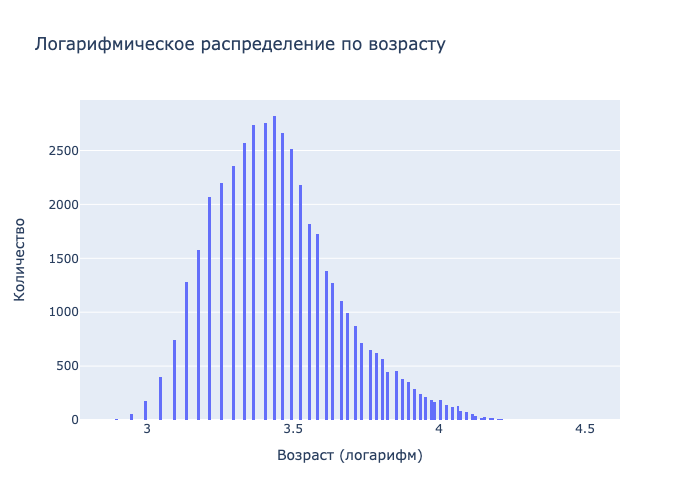

In [26]:
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score_mod(massaged_data, 'Возраст', log_scale=True, left=3, right=4)
print('outliers:', outliers.shape[0])
# outliers: 3
print('cleaned:', cleaned.shape[0])
# cleaned: 44482

age_log = np.log(massaged_data['Возраст']+1)
fig = px.histogram(age_log, title='Логарифмическое распределение по возрасту')
fig.update_layout(yaxis_title="Количество", xaxis_title='Возраст (логарифм)', showlegend=False)
fig.show()